<h2>Python Lecture #2 - Fundamentals of Data Manipulation</h2>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Import Data from Module</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#basic_grouping">Basics of Grouping</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>

</div>
 
<hr>


<h2>Setup of the Basic Python Environment </h2>


Import libraries: 


In [1]:
import pandas as pd     #importing pandas library 
import numpy as np    #importing numpy library 

In [2]:
nums = [1,2,3,4,5,6,7,8,9,10]  #creating a list of numbers from 1 to 10
df = pd.DataFrame(nums, columns=['Number'])  #creating a dataframe with the list of numbers

print(df)  #printing the dataframe

labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']  #adding labels to the list of numbers

df = pd.DataFrame(nums, columns=['Number'], index=labels)  #creating a dataframe with the list of numbers and labels 

# create nums3 which are random numbers in a range of 101 to 120 and add it to the dataframe df as a new column

nums3 = np.random.randint(101, 121, 10)  #creating a list of 10 random numbers from 101 to 120
df['Random'] = nums3  #adding the list of random numbers to the dataframe

# list the fields in the dataframe df and print the dataframe df 

print(df.columns)  #printing the fields in the dataframe

print(df)  #printing the dataframe





   Number
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
Index(['Number', 'Random'], dtype='object')
   Number  Random
A       1     109
B       2     118
C       3     110
D       4     113
E       5     119
F       6     101
G       7     109
H       8     107
I       9     115
J      10     115


In [ ]:
# Optional code to install requests library

# ! pip install requests

<h3>Load the data and store it in dataframe</h3>


In [3]:
import warnings
import pandas as pd
import requests
from io import StringIO

# Suppress SSL warnings
warnings.filterwarnings("ignore")

# URL of the CSV file
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

# Fetch the CSV file content
response = requests.get(path, verify=False)  # Disable SSL verification

# Read the CSV content into a DataFrame
df = pd.read_csv(StringIO(response.text))

# Show the first 5 rows of the DataFrame
print(df.head())

   symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0    

<h2 id="import_data">2. Showing Working Directory and Steps to Change Working Directory</h2>
<h3 id="import_data"> Importing and Exporting Excel Data Files </h3>

In [4]:
# show the current path

import os
print(os.getcwd())

# change current path to /Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Data Files for Python

os.chdir('/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Data Files for Python')
print(os.getcwd())


/
/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Data Files for Python


In [23]:
import pandas as pd

# Define the DataFrame (load data into df)
df = pd.read_csv('horsepower.csv')  # Replace 'your_data.csv' with your actual file

# Save df to an Excel file
df.to_excel('automobileEDA4.xlsx')


In [6]:

# Save df to a local CSV file
df.to_csv('automobileEDA3.csv')

# Read the CSV file
Car_Data = pd.read_csv('automobileEDA3.csv')
print(Car_Data.head())  # Show the first 5 rows of the data

# Read the Excel file
Car_Data_Excel = pd.read_excel('automobileEDA3.xlsx')
print(Car_Data_Excel.head())  # Show the first 5 rows of the data

   Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0 

<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


To install Seaborn we use pip, the Python package manager.


Import visualization packages "Matplotlib" and "Seaborn". Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [8]:
# list the data types for each column

import pandas as pd


print(df.dtypes)

#Summary statistics of the data frame df

print(df.describe())

# Save Summary Statistics to Excel File

df.describe().to_excel('Summary Statistics for Automotive Data.xlsx')


symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object
        symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000

<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;">Examples for Data Manipulation</div>

<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>
</div>


<class 'list'>
<class 'pandas.core.series.Series'>
0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
196    5400.0
197    5300.0
198    5500.0
199    4800.0
200    5400.0
Name: peak-rpm, Length: 201, dtype: float64
0      Medium
1      Medium
2      Medium
3      Medium
4      Medium
        ...  
196    Medium
197      High
198    Medium
199    Medium
200    Medium
Name: horsepower-binned, Length: 201, dtype: object


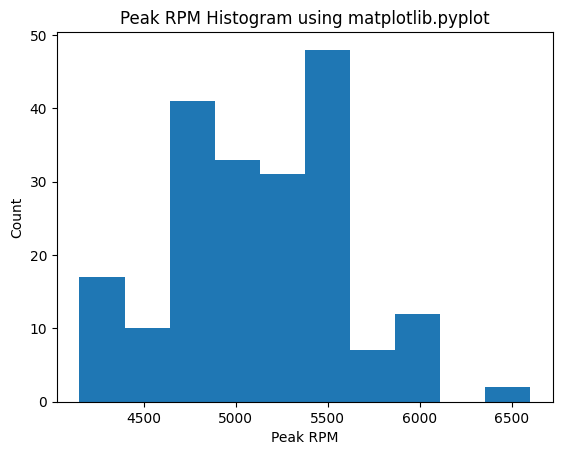

In [9]:
# Show the first 5 rows of the data

# a = 5
print(type(['peak-rpm']))  # Output: <class 'int'>
print(type(df['horsepower-binned']))  # Output: <class 'pandas.core.series.Series'>

print(df['peak-rpm'])           # Output: <class 'int'>
print(df['horsepower-binned'])  # Output: <class 'pandas.core.series.Series'>

# show a histogram and a boxplot of the peak-rpm column

df['peak-rpm'].plot(kind='hist')
plt.title('Peak RPM Histogram using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Count')
plt.show()


<h3>Plotting basic Boxplots and Histograms</h4>
<p>Matplotlib and seaborn techniques will be used.</p>

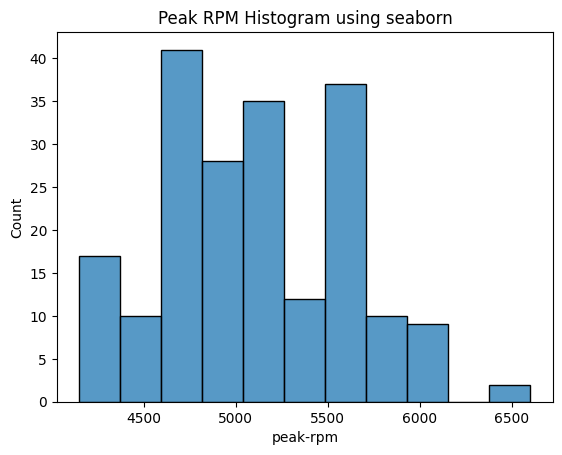

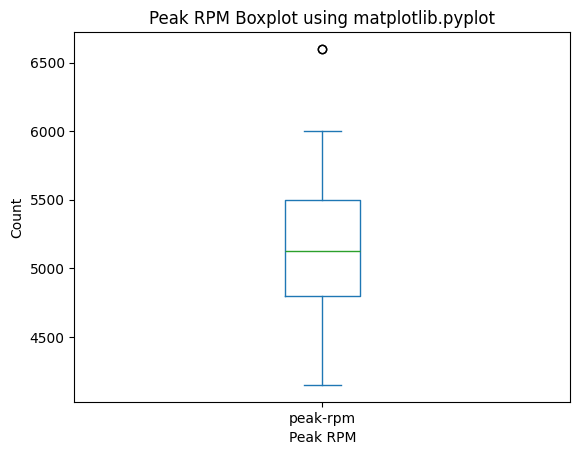

In [10]:

# Ensure the required libraries are installed
# %pip install seaborn matplotlib python-pptx

import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import pandas as pd


# Show a histogram of the peak-rpm column using seaborn
plt.figure()
sns.histplot(x='peak-rpm', data=df)
plt.title('Peak RPM Histogram using seaborn')
plt.savefig('peak_rpm_histogram.png')  # Save histogram as an image
plt.show()

# Show a boxplot of the peak-rpm column using matplotlib.pyplot
plt.figure()
df['peak-rpm'].plot(kind='box')
plt.title('Peak RPM Boxplot using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Count')
plt.savefig('peak_rpm_boxplot.png')  # Save boxplot as an image
plt.show()

# Create a PowerPoint presentation and add the boxplot image
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Use a layout with a title only
slide = prs.slides.add_slide(slide_layout)

# Add title
title = slide.shapes.title
title.text = "Peak RPM Boxplot"

# Add the boxplot image to the slide
img_path = 'peak_rpm_boxplot.png'
left = Inches(1)
top = Inches(1)
slide.shapes.add_picture(img_path, left, top, width=Inches(8), height=Inches(6))

# Save the PowerPoint presentation
prs.save('Peak_RPM_Boxplot.pptx')

<h2>Save a Boxplot to a PowerPoint Presentation</h2>

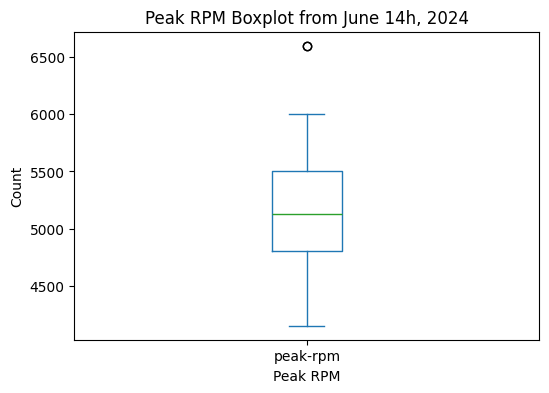

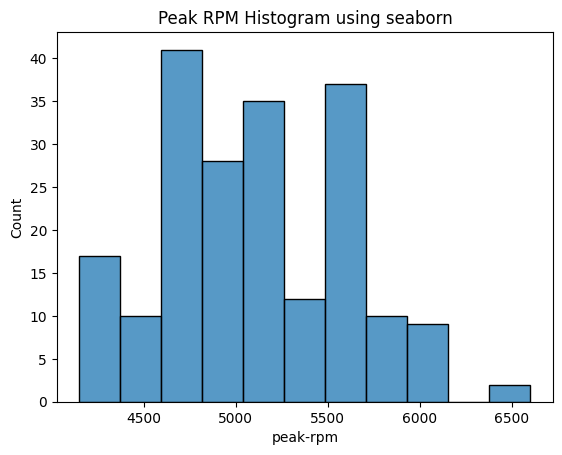

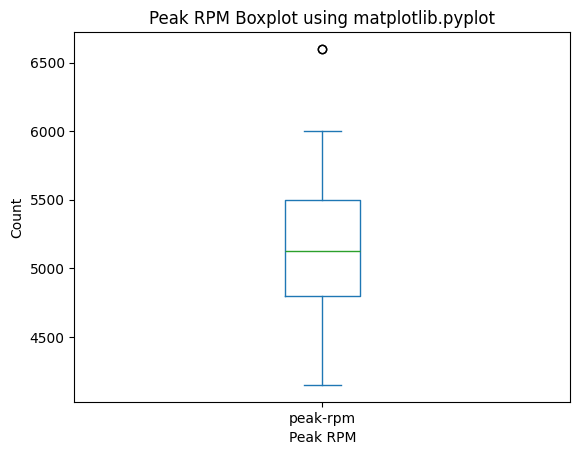

'peak_rpm_boxplot_presentation.pptx'

In [11]:
## Create a boxplot of the peak-rpm column using matplotlib.pyplot and save it as a PNG image
## Add the boxplot image to a PowerPoint presentation slide

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# Assuming df is already defined and contains the peak-rpm column

# Generate and save the boxplot
plt.figure(figsize=(6, 4)) # Set the figure size
df['peak-rpm'].plot(kind='box') # Create a boxplot
plt.title('Peak RPM Boxplot from June 14h, 2024') # Add a title
plt.xlabel('Peak RPM')
plt.ylabel('Count')
boxplot_path = 'peak_rpm_boxplot.png' # Define the file path and name
plt.savefig(boxplot_path) # Save the boxplot as a PNG image
plt.show() # Show the boxplot
plt.close() # Close the plot

sns.histplot(x='peak-rpm', data=df)
plt.title('Peak RPM Histogram using seaborn')
plt.show()

# show a boxplot of the peak-rpm column
df['peak-rpm'].plot(kind='box')
plt.title('Peak RPM Boxplot using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Count')
plt.show()

# Create a PowerPoint presentation and add the boxplot image to a slide
prs = Presentation() # Create a PowerPoint presentation
slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
slide = prs.slides.add_slide(slide_layout) # Add a slide to the presentation
title = slide.shapes.title # Add a title to the slide
title.text = "Peak RPM Boxplot" # Set the title text

# Add the image to the slide
left = Inches(2) # Set the position of the image
top = Inches(1.5) # Set the position of the image
slide.shapes.add_picture(boxplot_path, left, top, height=Inches(4.5)) # Add the image to the slide

# Save the PowerPoint presentation
pptx_path = 'peak_rpm_boxplot_presentation.pptx'
prs.save(pptx_path)

# Output the file path
pptx_path


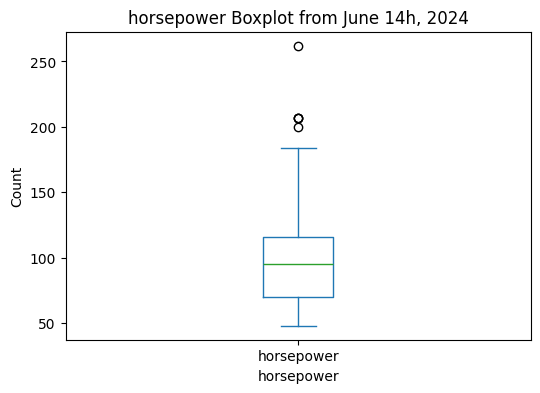

'peak_rpm_boxplot_presentationv2.pptx'

In [12]:
## Create a boxplot of the peak-rpm column using matplotlib.pyplot and save it as a PNG image
## Add the boxplot image to a PowerPoint presentation slide

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# Assuming df is already defined and contains the peak-rpm column

# Generate and save the boxplot for Slide #1
plt.figure(figsize=(6, 4)) # Set the figure size
df['peak-rpm'].plot(kind='box') # Create a boxplot
plt.title('Peak RPM Boxplot from June 14h, 2024') # Add a title
plt.xlabel('Peak RPM')
plt.ylabel('Count')
boxplot_path = 'peak_rpm_boxplot.png' # Define the file path and name
plt.savefig(boxplot_path) # Save the boxplot as a PNG image
plt.show # Show the boxplot
plt.close() # Close the plot

# Generate and save the boxplot for Slide #2
plt.figure(figsize=(6, 4)) # Set the figure size
df['horsepower'].plot(kind='box') # Create a boxplot
plt.title('horsepower Boxplot from June 14h, 2024') # Add a title
plt.xlabel('horsepower')
plt.ylabel('Count')
boxplot_path2 = 'horsepower_boxplot.png' # Define the file path and name
plt.savefig(boxplot_path2) # Save the boxplot as a PNG image
plt.show() # Show the boxplot
plt.close() # Close the plot



# Create a PowerPoint presentation and add the boxplot image to a slide
prs = Presentation() # Create a PowerPoint presentation

# Add The First Slide

slide_layout = prs.slide_layouts[5]  # Use a Title slide layout
slide = prs.slides.add_slide(slide_layout) # Add a slide to the presentation
title = slide.shapes.title # Add a title to the slide
title.text = "Peak RPM Boxplot Slide #1" # Set the title text

# Add the image to the slide
left = Inches(2) # Set the position of the image
top = Inches(1.5) # Set the position of the image
slide.shapes.add_picture(boxplot_path, left, top, height=Inches(4.5)) # Add the image to the slide

# Add The Second Slide

slide_layout = prs.slide_layouts[5]  # Use a Title blank slide layout
slide = prs.slides.add_slide(slide_layout) # Add a slide to the presentation
title = slide.shapes.title # Add a title to the slide
title.text = "Horsepower Box Plot" # Set the title text

# Add the image to the slide
left = Inches(2) # Set the position of the image
top = Inches(1.5) # Set the position of the image
slide.shapes.add_picture(boxplot_path2, left, top, height=Inches(4.5)) # Add the image to the slide


# Save the PowerPoint presentation
pptx_path = 'peak_rpm_boxplot_presentationv2.pptx'
prs.save(pptx_path)

# Output the file path
pptx_path


<h2>Multiple Boxplots - Sent to PowerPoint</h2>

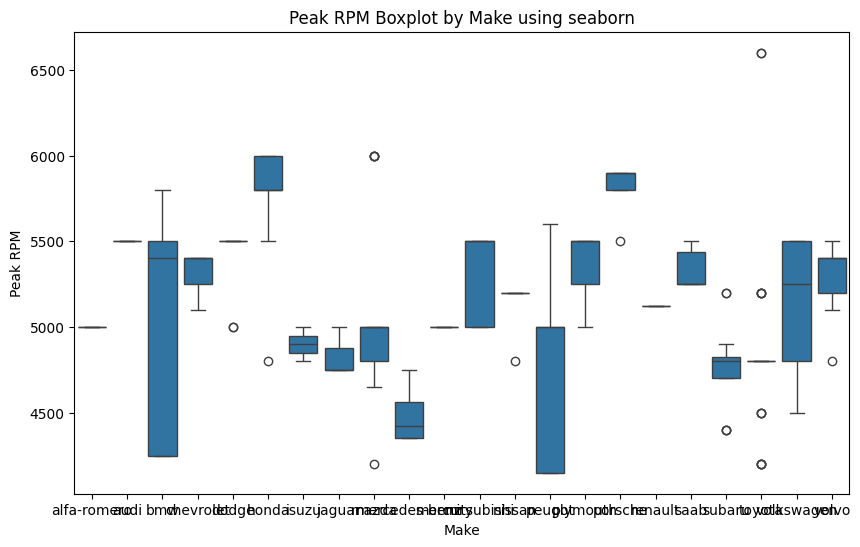

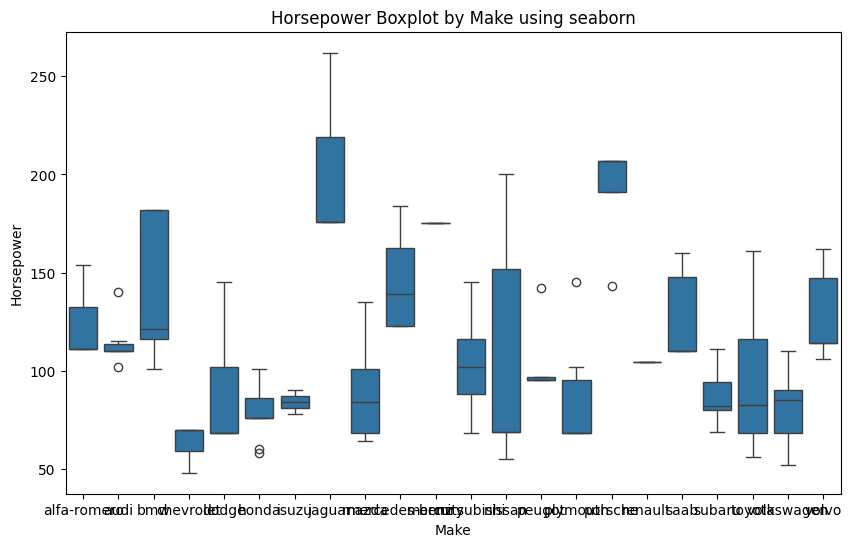

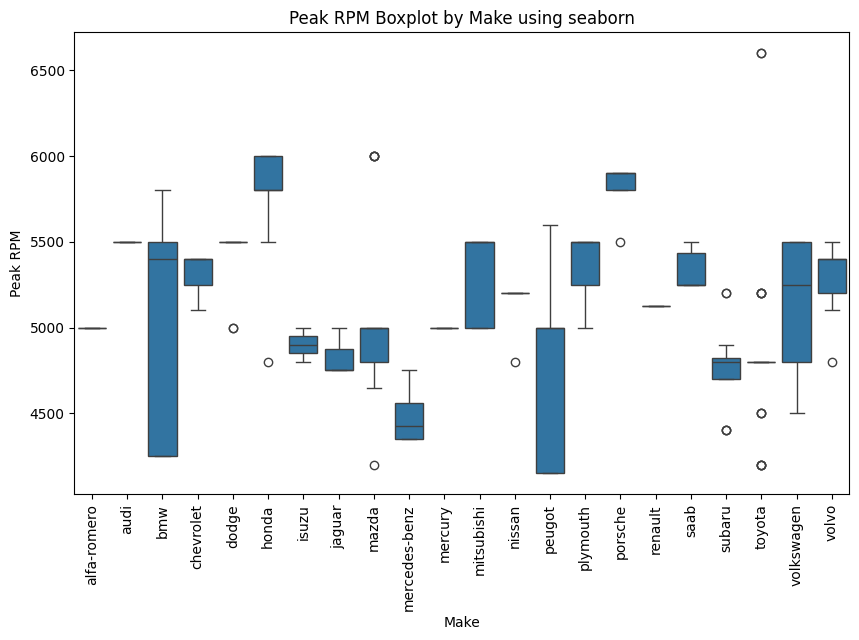

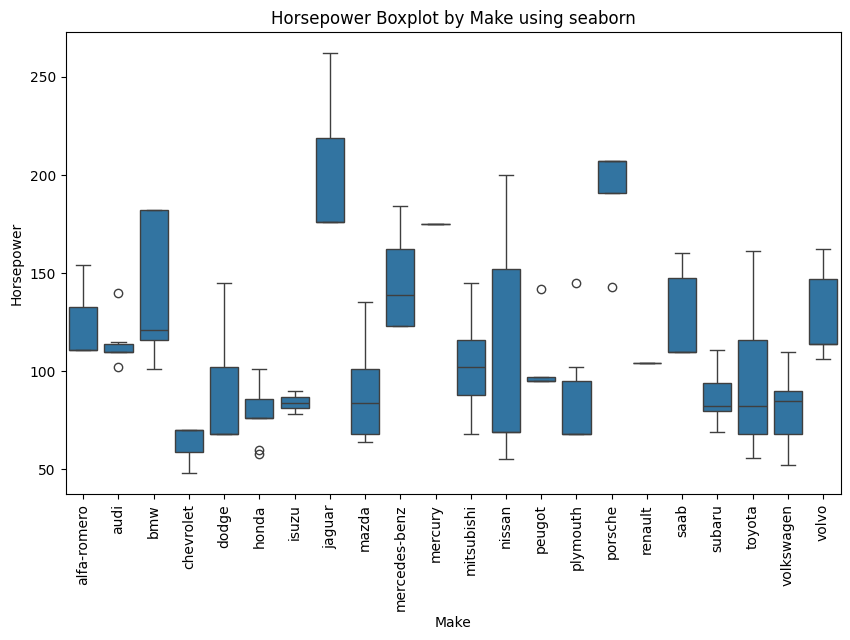

'boxplots_by_model_presentation.pptx'

In [13]:
#### Run Four Boxplots and Add to PowerPoint Presentation
import seaborn as sns
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
import pandas as pd
%matplotlib inline

# Generate the boxplot grouped by model for peak-rpm
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='peak-rpm', data=df)
plt.title('Peak RPM Boxplot by Make using seaborn')
plt.xlabel('Make')
plt.ylabel('Peak RPM')
boxplot_path1 = 'peak_rpm_boxplot_by_make.png'
plt.savefig(boxplot_path1)
plt.show()
plt.close()

# Generate the boxplot grouped by model for horsepower
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='horsepower', data=df)
plt.title('Horsepower Boxplot by Make using seaborn')
plt.xlabel('Make')
plt.ylabel('Horsepower')
boxplot_path2 = 'horsepower_boxplot_by_make2.png'
plt.savefig(boxplot_path2)
plt.show()
plt.close()

# Generate the boxplot grouped by model for peak-rpm
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='peak-rpm', data=df)
plt.title('Peak RPM Boxplot by Make using seaborn')
plt.xlabel('Make')
plt.ylabel('Peak RPM')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
boxplot_path3 = 'peak_rpm_boxplot_by_make3.png'
plt.savefig(boxplot_path3)
plt.show()
plt.close()

# Generate the boxplot grouped by model for horsepower
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='horsepower', data=df)
plt.title('Horsepower Boxplot by Make using seaborn')
plt.xlabel('Make')
plt.ylabel('Horsepower')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
boxplot_path4 = 'horsepower_boxplot_by_make4.png'
plt.savefig(boxplot_path4)
plt.show()
plt.close()


# Create a PowerPoint presentation and add the boxplot images to slides
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Use a blank slide layout

# Add the first boxplot to a slide
slide1 = prs.slides.add_slide(slide_layout)
title1 = slide1.shapes.title
title1.text = "Peak RPM Boxplot by Make #1"
slide1.shapes.add_picture(boxplot_path1, Inches(1), Inches(1.5), height=Inches(5))

# Add the second boxplot to a slide
slide2 = prs.slides.add_slide(slide_layout)
title2 = slide2.shapes.title
title2.text = "Horsepower Boxplot by Make #2"
slide2.shapes.add_picture(boxplot_path2, Inches(1), Inches(1.5), height=Inches(5))

# Add the second boxplot to a slide to create slide #3
slide3 = prs.slides.add_slide(slide_layout)
title3 = slide3.shapes.title
title3.text = "Horsepower Boxplot by Make #3"
slide3.shapes.add_picture(boxplot_path3, Inches(1), Inches(1.5), height=Inches(5))

# Add the second boxplot to a slide to create slide #4
slide4 = prs.slides.add_slide(slide_layout)
title4 = slide4.shapes.title
title4.text = "Horsepower Boxplot by Make #4"
slide4.shapes.add_picture(boxplot_path4, Inches(1), Inches(1.5), height=Inches(5))

# Save the PowerPoint presentation
pptx_path = 'boxplots_by_model_presentation.pptx'
prs.save(pptx_path)

# Output the file path
pptx_path

<h3>Let's expand on the Histogram Plot using Matplotlib</h3>
<p>The normal curve helps provide guidance on whether the distribution is a Normal Curve</p>

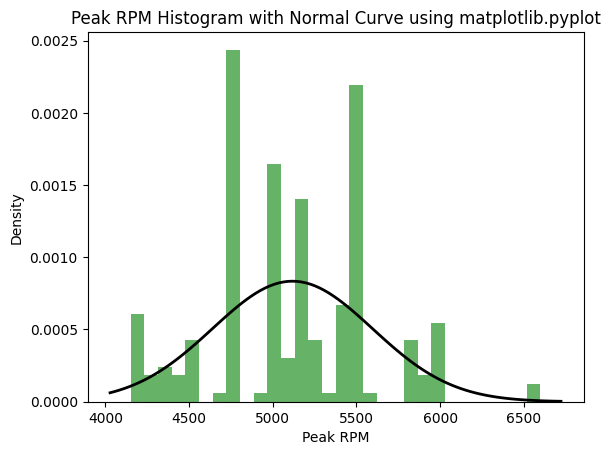

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'peak-rpm' is the column you're interested in
# Example DataFrame creation for context
# df = pd.DataFrame({'peak-rpm': np.random.normal(loc=5000, scale=1000, size=1000)})

# Calculate mean and standard deviation
mean = df['peak-rpm'].mean()
std = df['peak-rpm'].std()

# Plot the histogram
df['peak-rpm'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g')

# Title and labels
plt.title('Peak RPM Histogram with Normal Curve using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Density')

# Generate data points for the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

# Plot the normal curve
plt.plot(x, p, 'k', linewidth=2)

# Show the plot
plt.show()

<h3>The Bins for Peak RPM are lumpy and not smoothly distributed</h3>
<p>Consideration of the recoding Peak RPM into categories should be considered.  But first let's try to decrease the number of bins</p> 

from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df['peak-rpm'].plot(kind='box', ax=ax)
plt.title('Peak RPM Boxplot using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Count')

canvas = FigureCanvasPgf(fig)
canvas.print_pgf('boxplot.pgf')

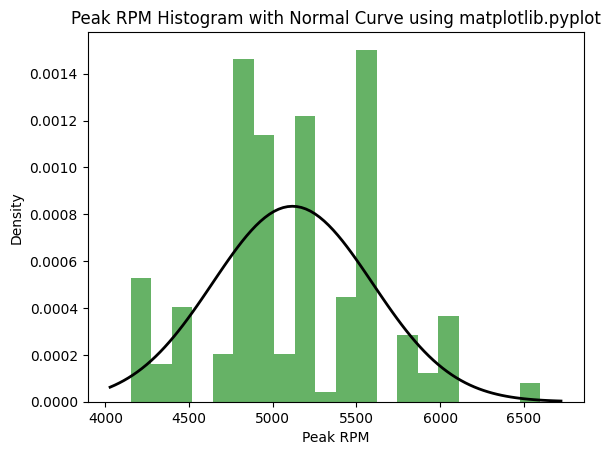

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'peak-rpm' is the column you're interested in
# Example DataFrame creation for context
# df = pd.DataFrame({'peak-rpm': np.random.normal(loc=5000, scale=1000, size=1000)})

# Calculate mean and standard deviation
mean = df['peak-rpm'].mean()
std = df['peak-rpm'].std()

# Plot the histogram
df['peak-rpm'].plot(kind='hist', bins=20, density=True, alpha=0.6, color='g')  # decrease the number of bins to 20 <<<<<----------

# Title and labels
plt.title('Peak RPM Histogram with Normal Curve using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Density')

# Generate data points for the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

# Plot the normal curve
plt.plot(x, p, 'k', linewidth=2)

# Show the plot
plt.show()

<h3>One more adjustment to this Histogram</h3>
<p>Let's reduce to the number of bins to 10</p>

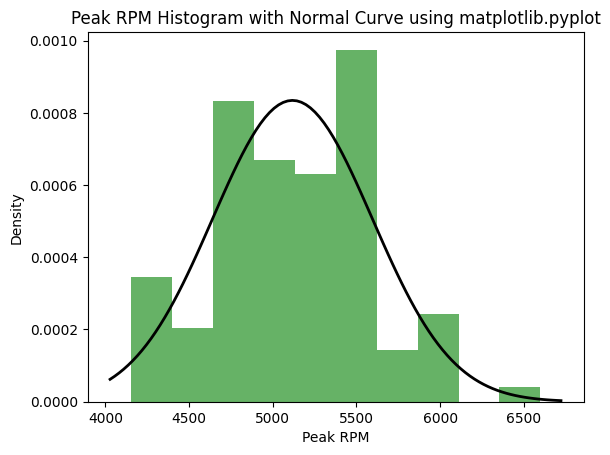

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and 'peak-rpm' is the column you're interested in
# Example DataFrame creation for context
# df = pd.DataFrame({'peak-rpm': np.random.normal(loc=5000, scale=1000, size=1000)})

# Calculate mean and standard deviation
mean = df['peak-rpm'].mean()
std = df['peak-rpm'].std()

# Plot the histogram
df['peak-rpm'].plot(kind='hist', bins=10, density=True, alpha=0.6, color='g')  # decrease the number of bins to 20 <<<<<----------

# Title and labels
plt.title('Peak RPM Histogram with Normal Curve using matplotlib.pyplot')
plt.xlabel('Peak RPM')
plt.ylabel('Density')

# Generate data points for the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

# Plot the normal curve
plt.plot(x, p, 'k', linewidth=2)

# Show the plot
plt.show()

<h3>Type of Engine can effect Peak RPM</h3>
<p>Let's look at the Types of Engine and Cross-Tabulate it against Peak RPM</p>

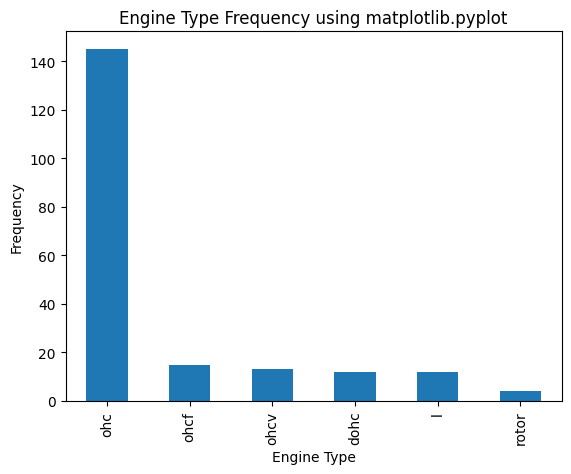

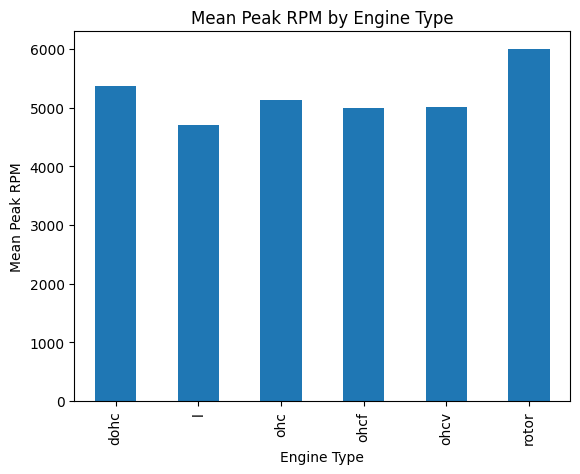

In [17]:
#show the frequency of response for engine-type column


df['engine-type'].value_counts() # count the frequency of each unique value of engine-type
plt.show()

#show the frequency of response for engine-type column by Peak RPM

df['engine-type'].value_counts().plot(kind='bar') # plot the frequency of each unique value of engine-type
plt.title('Engine Type Frequency using matplotlib.pyplot')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.show()

#for each unique value of engine-type, show the mean of peak-rpm

df.groupby('engine-type')['peak-rpm'].mean().plot(kind='bar') # group by engine-type and calculate the mean of peak-rpm
plt.title('Mean Peak RPM by Engine Type') 
plt.xlabel('Engine Type')
plt.ylabel('Mean Peak RPM')
plt.show()


<h2>An Example of Looking a Differences in a Numeric Value by Two Categorical Values - 2 x 2 ANOVA </h2>

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset
np.random.seed(0)

# Independent variables
IV1 = ['A', 'B']
IV2 = ['X', 'Y']

# Generating random data
data = {
    'IV1': np.random.choice(IV1, 100),
    'IV2': np.random.choice(IV2, 100),
    'DV': np.random.normal(0, 1, 100)
}

df = pd.DataFrame(data)

print(df.dtypes)

# show a table of responses for each unique value of IV1

print(df.groupby('IV1')['DV'].describe())

# Encode the categorical variable 'IV1'
label_encoder = LabelEncoder()
df['IV1_encoded'] = label_encoder.fit_transform(df['IV1'])

print(df.groupby('IV1')['DV'].describe())

print(df.dtypes)

IV1     object
IV2     object
DV     float64
dtype: object
     count      mean       std       min       25%       50%       75%  \
IV1                                                                      
A     44.0  0.207506  0.902637 -1.536244 -0.536281  0.336655  0.910085   
B     56.0  0.180414  1.080609 -1.544771 -0.690804  0.059691  0.996092   

          max  
IV1            
A    1.910065  
B    2.383145  
     count      mean       std       min       25%       50%       75%  \
IV1                                                                      
A     44.0  0.207506  0.902637 -1.536244 -0.536281  0.336655  0.910085   
B     56.0  0.180414  1.080609 -1.544771 -0.690804  0.059691  0.996092   

          max  
IV1            
A    1.910065  
B    2.383145  
IV1             object
IV2             object
DV             float64
IV1_encoded      int64
dtype: object


<h2>The Use of LabelEncoder</h2>

<h3># Encode the categorical variable 'IV1'</h3>
<p>***label_encoder = LabelEncoder()</p>

**df['IV1_encoded'] = label_encoder.fit_transform(df['IV1'])**




The selected code is used to encode a categorical variable 'IV1' in a dataframe [`df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%2540lehigh.edu%2FMy%2520Drive%2FLehigh%2520Fall%25202024%2FPython%2520Developments%2FPython%2520Development%2520Jupyter%2520Notebooks%2FStarting%2520Programs%2F2%2520Exploratory%2520Data%2520Analysis.ipynb%23X40sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A20%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb"). This is done using the [`LabelEncoder`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A33%2C%22character%22%3A6%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") class from the `sklearn.preprocessing` module.

The [`LabelEncoder`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A33%2C%22character%22%3A6%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") class is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. It can be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

Here's a step-by-step explanation of what the code does:

1. [`label_encoder = LabelEncoder()`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A23%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb"): This line creates an instance of the [`LabelEncoder`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A33%2C%22character%22%3A6%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") class.

2. [`df['IV1_encoded'] = label_encoder.fit_transform(df['IV1'])`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%2540lehigh.edu%2FMy%2520Drive%2FLehigh%2520Fall%25202024%2FPython%2520Developments%2FPython%2520Development%2520Jupyter%2520Notebooks%2FStarting%2520Programs%2F2%2520Exploratory%2520Data%2520Analysis.ipynb%23X40sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A20%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb"): This line applies the [`fit_transform`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A100%2C%22character%22%3A8%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") method of the [`label_encoder`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A23%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb") instance to the 'IV1' column of the dataframe [`df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%2540lehigh.edu%2FMy%2520Drive%2FLehigh%2520Fall%25202024%2FPython%2520Developments%2FPython%2520Development%2520Jupyter%2520Notebooks%2FStarting%2520Programs%2F2%2520Exploratory%2520Data%2520Analysis.ipynb%23X40sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A20%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb"). The [`fit_transform`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A100%2C%22character%22%3A8%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") method is a combination of the `fit` and `transform` methods. 

   - The `fit` method finds all the unique values in the given data and assigns each unique value to a different integer. This mapping is stored in the [`label_encoder`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A23%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb") instance.
   
   - The `transform` method then applies this mapping to the data, replacing each unique value in the original data with the corresponding integer.

The result of the [`fit_transform`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22path%22%3A%22%2Fopt%2Fhomebrew%2Flib%2Fpython3.11%2Fsite-packages%2Fsklearn%2Fpreprocessing%2F_label.py%22%2C%22scheme%22%3A%22file%22%7D%2C%7B%22line%22%3A100%2C%22character%22%3A8%7D%5D "../../../../../../../../opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py") method is a series where all the unique values in the 'IV1' column of [`df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%2540lehigh.edu%2FMy%2520Drive%2FLehigh%2520Fall%25202024%2FPython%2520Developments%2FPython%2520Development%2520Jupyter%2520Notebooks%2FStarting%2520Programs%2F2%2520Exploratory%2520Data%2520Analysis.ipynb%23X40sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A20%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb") have been replaced with integers. This series is then assigned to a new column in [`df`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22external%22%3A%22vscode-notebook-cell%3A%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%2540lehigh.edu%2FMy%2520Drive%2FLehigh%2520Fall%25202024%2FPython%2520Developments%2FPython%2520Development%2520Jupyter%2520Notebooks%2FStarting%2520Programs%2F2%2520Exploratory%2520Data%2520Analysis.ipynb%23X40sZmlsZQ%253D%253D%22%2C%22path%22%3A%22%2FUsers%2Frudolphsurovcik%2FLibrary%2FCloudStorage%2FGoogleDrive-grs3%40lehigh.edu%2FMy%20Drive%2FLehigh%20Fall%202024%2FPython%20Developments%2FPython%20Development%20Jupyter%20Notebooks%2FStarting%20Programs%2F2%20Exploratory%20Data%20Analysis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X40sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A20%2C%22character%22%3A0%7D%5D "/Users/rudolphsurovcik/Library/CloudStorage/GoogleDrive-grs3@lehigh.edu/My Drive/Lehigh Fall 2024/Python Developments/Python Development Jupyter Notebooks/Starting Programs/2 Exploratory Data Analysis.ipynb") called 'IV1_encoded'. 

This process is known as label encoding and is a common preprocessing step when working with categorical data in machine learning.

In [19]:

# Encode the categorical variable 'IV1'
label_encoder = LabelEncoder()
df['IV1_encoded'] = label_encoder.fit_transform(df['IV1'])

# Calculate Pearson correlation
pearson_corr = df[['IV1_encoded', 'DV']].corr(method='pearson')
print(pearson_corr)

# Conduct Tukey's HSD test
Tukey_HSD = pairwise_tukeyhsd(df['DV'], df['IV1'])
print(Tukey_HSD)

# Review the Data Set Using Data Wrangling Techniques
# print(df.head())
# print(df.describe())
# print(df.info())

# Round column 'DV' (Number of decimals: 4)
df = df.round({'DV': 4})

print(df.head())

             IV1_encoded        DV
IV1_encoded     1.000000 -0.013497
DV             -0.013497  1.000000
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B  -0.0271 0.894 -0.4294 0.3753  False
--------------------------------------------------
  IV1 IV2      DV  IV1_encoded
0   A   Y -1.1651            0
1   B   X  0.9008            1
2   B   X  0.4657            1
3   A   Y -1.5362            0
4   B   X  1.4883            1


Will add some additional Syntax later


For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [20]:
# Calculate Pearson correlation
corr = df[['IV1_encoded', 'DV']].corr(method='pearson')
print(pearson_corr)

print(df.dtypes['IV1_encoded'])
print(df.dtypes['DV'])


             IV1_encoded        DV
IV1_encoded     1.000000 -0.013497
DV             -0.013497  1.000000
int64
float64


The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.


<div style="background-color: #cce5ff; color: #004085; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;">Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</div>


In [24]:
# Define the DataFrame (load data into df)
df = pd.read_csv('horsepower.csv')  # Replace 'your_data.csv' with your actual file

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [25]:
import pandas as pd


# Check if the necessary columns exist
required_columns = ['bore', 'stroke', 'compression-ratio', 'horsepower']

if all(column in df.columns for column in required_columns):
    # Calculate Pearson correlation
    corr = df[required_columns].corr(method='pearson')
    # Print the correlation matrix
    print(corr)
else:
    missing_columns = [column for column in required_columns if column not in df.columns]
    print(f"Error: The following required columns are missing from the DataFrame: {missing_columns}")

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566936
stroke            -0.055390  1.000000           0.187923    0.098462
compression-ratio  0.001263  0.187923           1.000000   -0.214514
horsepower         0.566936  0.098462          -0.214514    1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>


 Let's see several examples of different linear relationships:


<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


(0.0, 53216.87862483078)

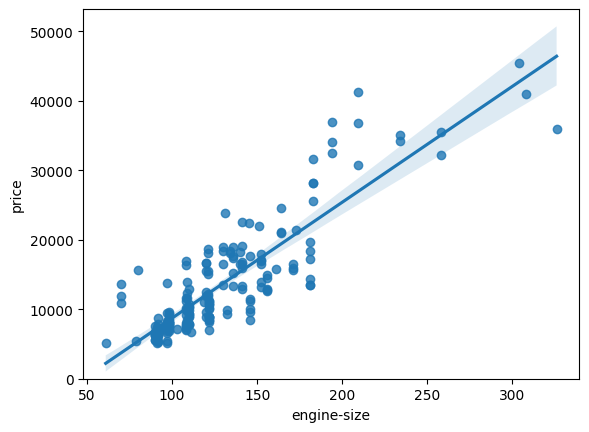

In [26]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


 We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [33]:
%pip install scipy
# ! mamba install scipy=1.7.1-y
from scipy.stats import pearsonr

# df.["engine-size", "price"].corr(df)

corr, _ = pearsonr(df['engine-size'], df['price'])

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()


Note: you may need to restart the kernel to use updated packages.


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Text(0.5, 1.0, 'horsepower bins')

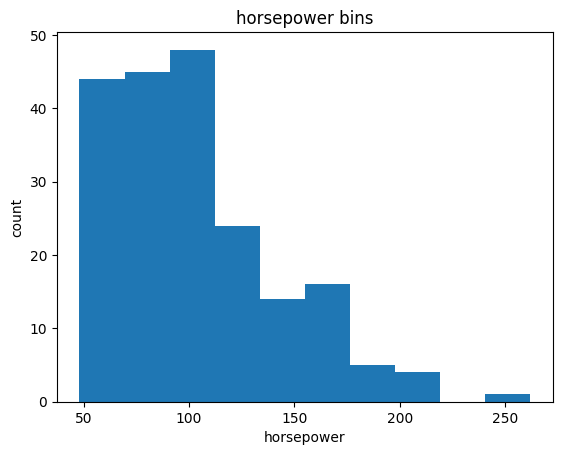

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<div style="background-color: #cce5ff; color: #004085; padding: 20px; border-radius: 5px; margin-top: 20px; border: 1px solid #b8daff;">Show Scatterplot of Engine Size and Price, include Regression Line, and R^2</div>

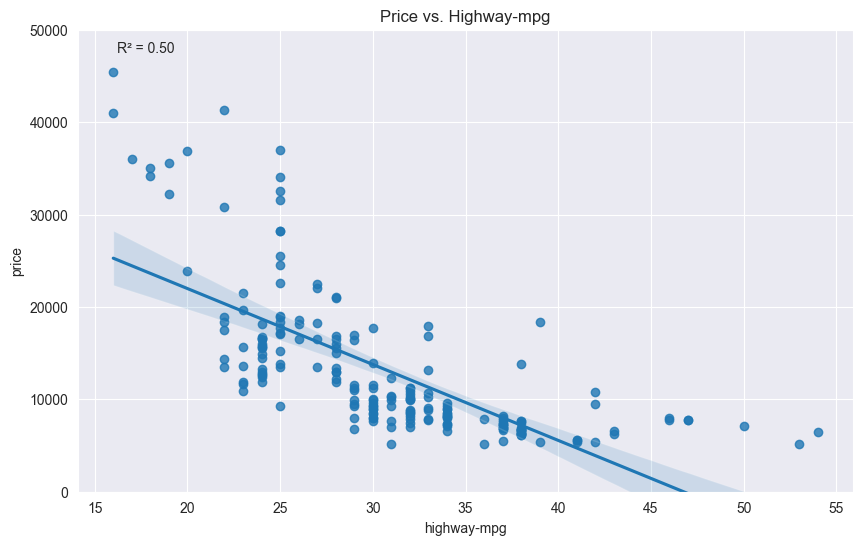

In [58]:
# Scatterplot of engine-size and price
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

title = 'Price vs. Highway-mpg'

# Part 1: Create a regression plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title(title)
plt.ylim(0,50000)  # Optionally, specify an upper limit as plt.ylim(0, upper_limit)

# Calculate R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['highway-mpg'], df['price'])
r_squared = r_value**2

# Display R-squared value on the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()




<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>


In [54]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #b8daff;">We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately (r = -0.704). <p> 
If we square pearson (r), R^2 is the coefficient of determination or the amount of variance in one variable explained by the variance of another variable.<p>The R^2 was shown as ~0.50 in the previous regression plot</div>


Let's see if "peak-rpm" is a predictor variable of "price".


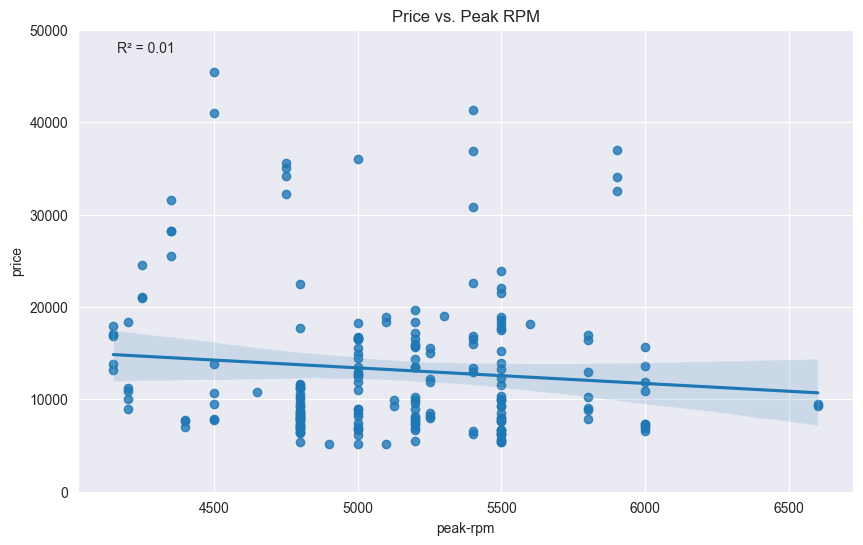

In [60]:
## Create a scatter plot of peak-rpm and price

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Part 1: Create a regression plot

title = 'Price vs. Peak RPM'

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,50000)  # Optionally, specify an upper limit as plt.ylim(0, upper_limit)
plt.title(title)

# Calculate R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['peak-rpm'], df['price'])
r_squared = r_value**2

# Display R-squared value on the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [61]:
### Correlation between peak-rpm and price

df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #b8daff;">
  We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately (r = -0.10). <p> 
  If we square pearson (r), R^2 is the coefficient of determination or the amount of variance in one variable explained by the variance of another variable.<p>
  The R^2 was shown as ~0.01 in the previous regression plot.<p>
  The R^2 indicates that <b>99%</b> of the variance of Price is <b>NOT Explained by Peak-RPM</b>
</div>


<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #b8daff;">
<p>Find the correlation  between x="stroke" and y="price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].</p>
</div>


The Pearson Correlation Coefficient is nan with a P-value of P = nan


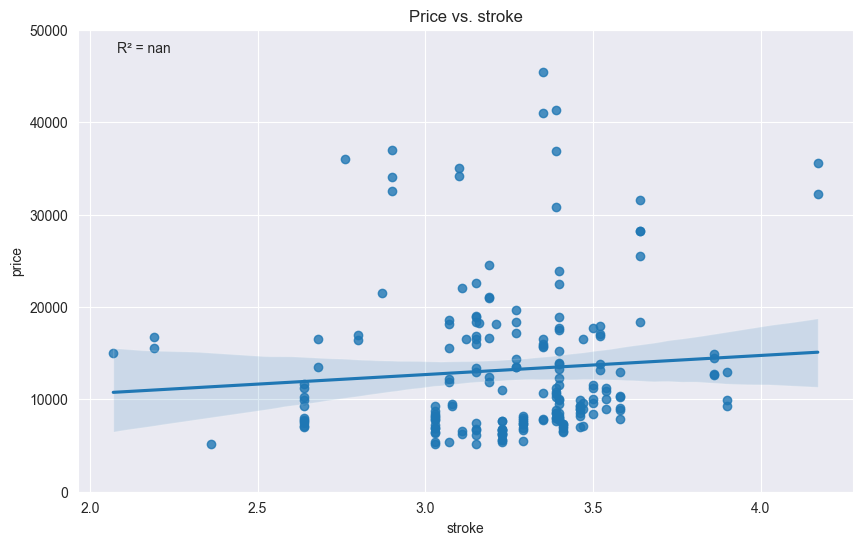

In [76]:
# Examine Relationship Between Stroke and Price

#%pip install scipy
#from scipy.stats import pearsonr
#old !mamba install scipy=1.7.1-y

# Calculate Pearson's correlation coefficient and the p-value
pearson_coef, p_value = pearsonr(df['stroke'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)


### Correlation between stroke and price and plot the regression line in a Scatterplot

title = 'Price vs. stroke'

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,50000)  # Optionally, specify an upper limit as plt.ylim(0, upper_limit)
plt.title(title)

# Calculate R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['stroke'], df['price'])
r_squared = r_value**2

# Display R-squared value on the plot
plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()





<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #b8daff;">
<p>Instead of Repeating the Coding, we can define a Function</p>
<p>There are a number of arguments passed by the function which allows to have more control over the output</p>
</div>


In [77]:
##### Create Regression Function

def plot_regression_with_r_squared(df, x_var, y_var, figsize=(10, 6), style="darkgrid", ylim=(0, 50000), title=""):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    
    plt.figure(figsize=figsize)
    sns.set_style(style)
    sns.regplot(x=x_var, y=y_var, data=df)
    plt.ylim(ylim)  # Optionally, specify an upper limit as plt.ylim(0, upper_limit)
    plt.title(title)

    # Calculate R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_var], df[y_var])
    r_squared = r_value**2

    # Display R-squared value on the plot
    plt.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes)

    plt.show()

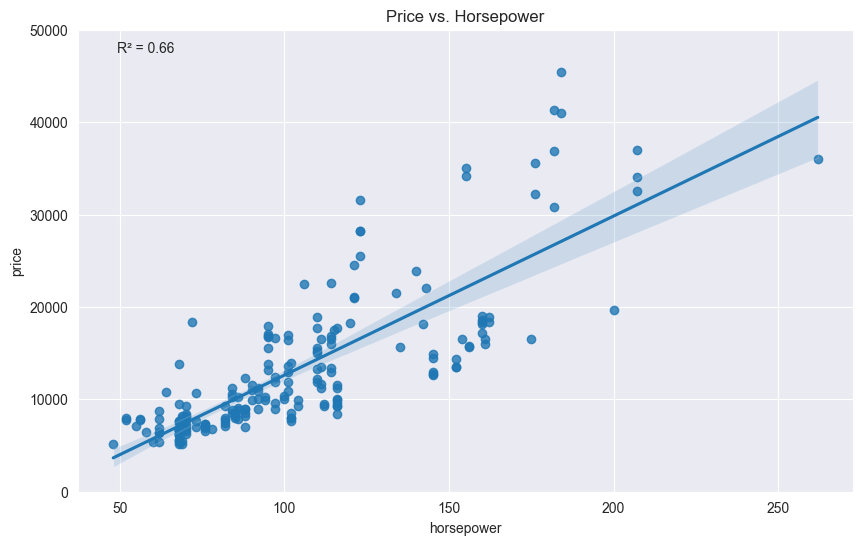

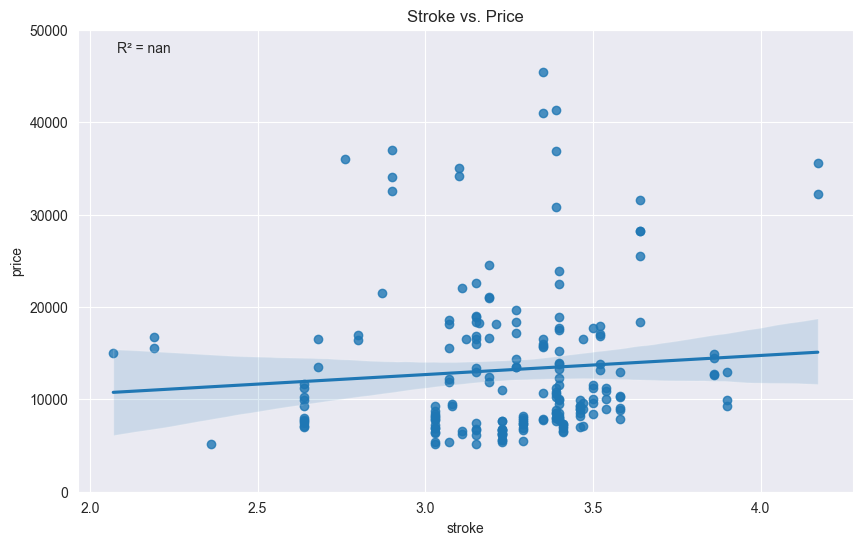

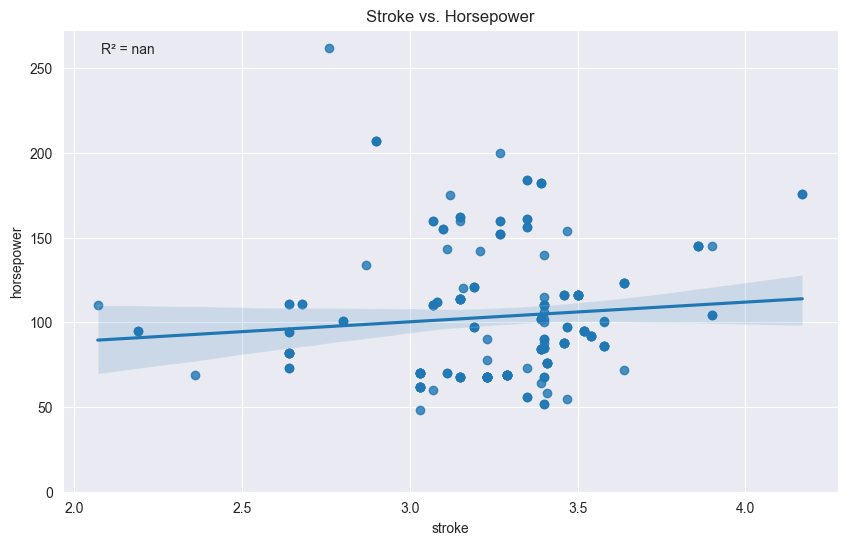

In [81]:
### Call the Function Created

plot_regression_with_r_squared(df, 'horsepower','price', figsize=(10, 6), style="darkgrid", ylim=(0, 50000), title="Price vs. Horsepower")
plot_regression_with_r_squared(df, 'stroke','price', figsize=(10, 6), style="darkgrid", ylim=(0, 50000), title="Stroke vs. Price")
plot_regression_with_r_squared(df, 'stroke','horsepower', figsize=(10, 6), style="darkgrid", ylim=(0), title="Stroke vs. Horsepower")

<div style="background-color: #1f77b4; color: #FFFFE0; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #b8daff;">
<p>By defining a function, it simplies repeative actions</p>
<p>Once the function is debugged, the only processing issue is that all the function arguements are valid</p>
</div>


<div style="background-color: #DC143C; color: #000000; padding: 20px; border-radius: 25px; margin-top: 30px; border: 1px solid #8B0000;">
<h3>Categorical Variables</h3>
<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories.<p>
<p>The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>
</div>






Let's look at the relationship between "body-style" and "price".


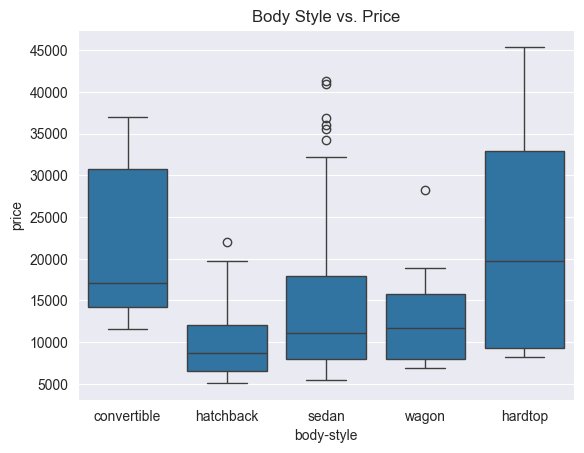

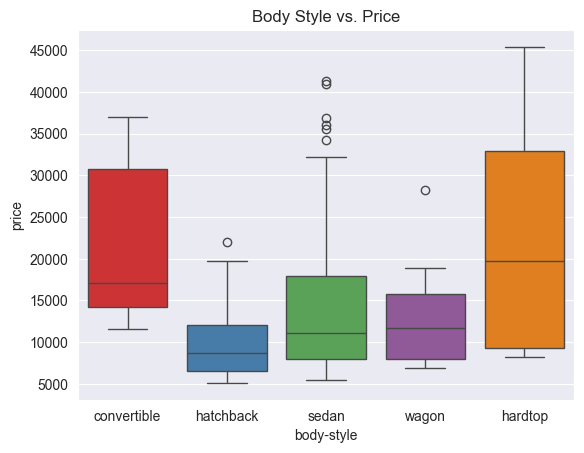

In [85]:
# Boxplot of Body Style vs. Price using seaborn shown two different ways

title = 'Body Style vs. Price'

sns.boxplot(x="body-style", y="price", data=df)
plt.title(title)
plt.show()

sns.boxplot(x="body-style", y="price", data=df, palette='Set1')
plt.title(title)
plt.show()

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>


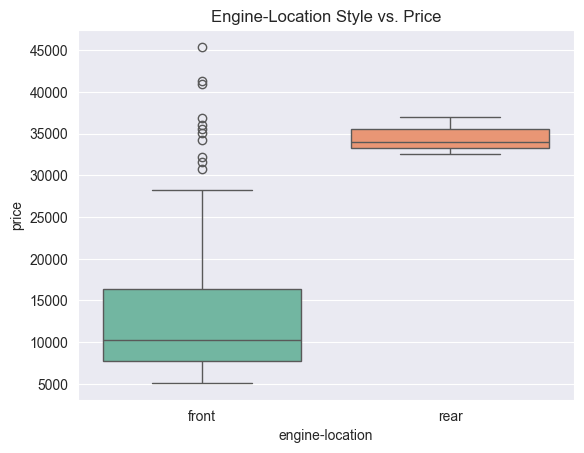

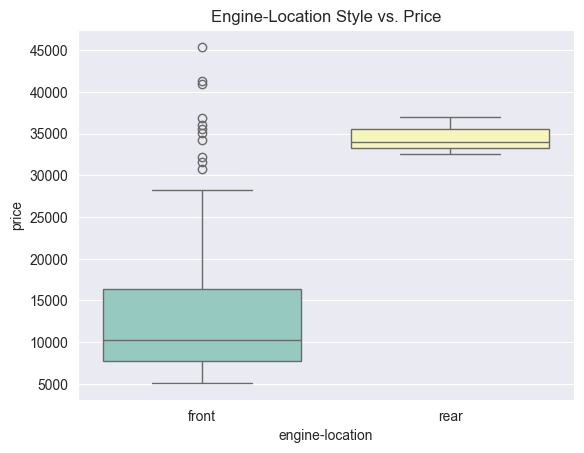

col_0 engine-location    Mean-Price
0               front  12884.085859
1                rear  34528.000000
                 count          mean          std      min      25%      50%  \
engine-location                                                                
front            198.0  12884.085859  7552.278510   5118.0   7775.0  10221.5   
rear               3.0  34528.000000  2291.287847  32528.0  33278.0  34028.0   

                     75%      max  
engine-location                    
front            16322.0  45400.0  
rear             35528.0  37028.0  


In [93]:
# Boxplot of Engine Location vs. Price using seaborn shown two different ways
import pandas as pd

title = 'Engine-Location Style vs. Price'

sns.boxplot(x="engine-location", y="price", data=df, palette='Set2')
plt.title(title)
plt.show()

sns.boxplot(x="engine-location", y="price", data=df, palette='Set3')
plt.title(title)
plt.show()

# Crosstabulation of engine-location and mean price
mean_price_by_drive_wheels = pd.crosstab(index=df['engine-location'], columns='Mean-Price', values=df['price'], aggfunc='mean').reset_index()

print(mean_price_by_drive_wheels)

# Grouping the DataFrame by 'engine-location' and then describing the 'price' column
description_by_engine_location = df.groupby('engine-location')['price'].describe()

print(description_by_engine_location)

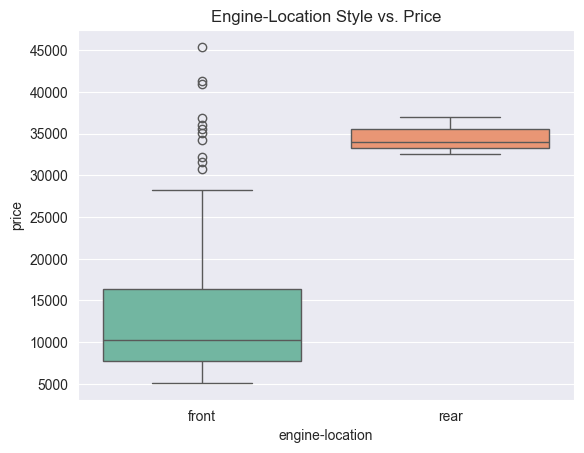

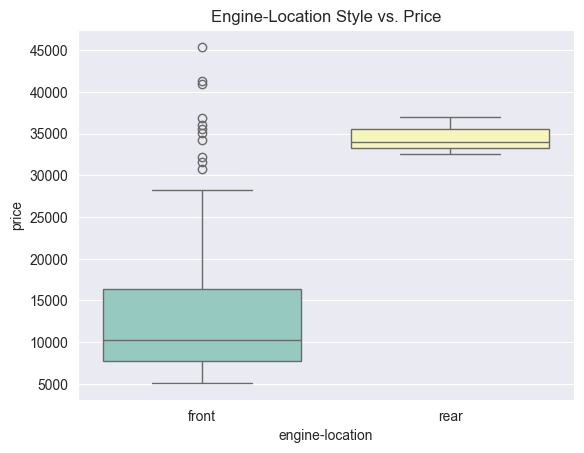

col_0 engine-location    Mean Price
0               front  12884.085859
1                rear  34528.000000


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is a pre-defined DataFrame containing 'engine-location' and 'price' columns

# Boxplot of Engine Location vs. Price using seaborn shown two different ways

title = 'Engine-Location Style vs. Price'

sns.boxplot(x="engine-location", y="price", data=df, palette='Set2')
plt.title(title)
plt.show()

sns.boxplot(x="engine-location", y="price", data=df, palette='Set3')
plt.title(title)
plt.show()

# Crosstabulation of engine-location and mean price
# Corrected: 'columns' parameter value from 'engine-location' to a meaningful column name, e.g., 'Mean Price'
mean_price_by_engine_location = pd.crosstab(index=df['engine-location'], columns='Mean Price', values=df['price'], aggfunc='mean').reset_index()

print(mean_price_by_engine_location)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


 Let's examine "drive-wheels" and "price".


col_0 drive-wheels    mean_price
0              4wd  10241.000000
1              fwd   9244.779661
2              rwd  19757.613333


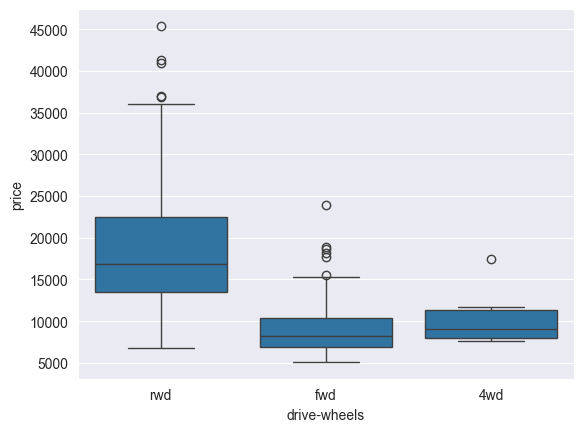

In [88]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

import pandas as pd

# Crosstabulation of drive-wheels and mean price
mean_price_by_drive_wheels = pd.crosstab(index=df['drive-wheels'], columns='mean_price', values=df['price'], aggfunc='mean').reset_index()

print(mean_price_by_drive_wheels)


<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


 We can apply the method "describe" as follows:


In [40]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:


In [41]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>


In [42]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

We can convert the series to a dataframe as follows:


In [43]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column  'drive-wheels' to 'value_counts'.


In [44]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


 Now let's rename the index to 'drive-wheels':


In [45]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engine-location'.


In [46]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.</p>


In [11]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>


In [12]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.


In [13]:
# grouping results

#! mamba install scipy=1.7.1-y
from scipy import stats

df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

TypeError: Could not convert sedanhatchbacksedansedanwagonwagonwagonwagon to numeric

<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.</p>


In [14]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

<p>In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:</p>


In [15]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.</p>


In [16]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [17]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<details><summary>Click here for the solution</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


If you did not import "pyplot", let's do it again. 


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels and Body Style vs. Price</h4>


Let's use a heat map to visualize the relationship between Body Style vs Price.


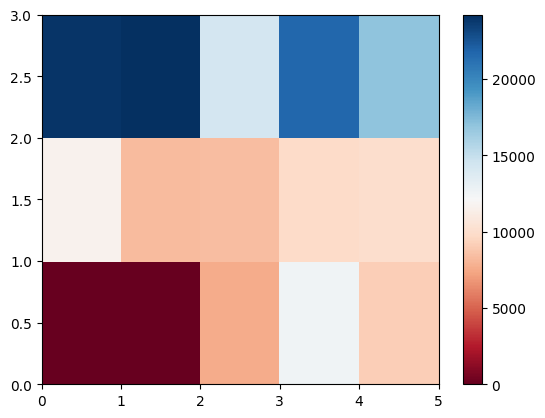

In [19]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

<p>The default labels convey no useful information to us. Let's change that:</p>


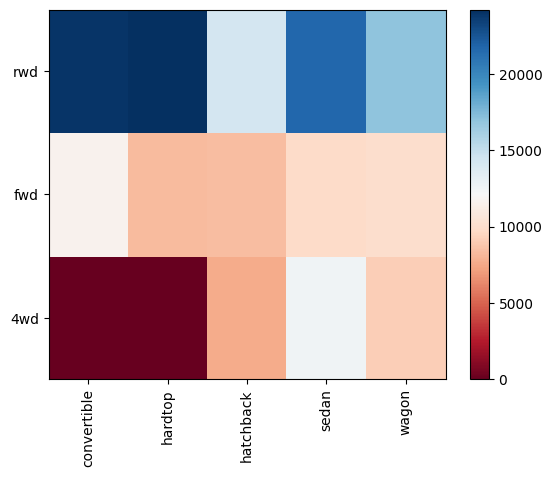

In [20]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Visualization is very important in data science, and Python visualization packages provide great freedom. We will go more in-depth in a separate Python visualizations course.</p>

<p>The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".</p>

<p>To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?</p>


<h2 id="correlation_causation">5. Correlation and Causation</h2>


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>


<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>


In [22]:
import pandas as pd
import numpy as np
#df.corr()

Sometimes we would like to know the significant of the correlation estimate. 


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain this information using  "stats" module in the "scipy"  library.


In [23]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 


In [24]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655085  with a P-value of P = 8.076488270732338e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [25]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P =  6.369057428260921e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [26]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158386e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [27]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522666  with a P-value of P = 9.200335510483504e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-Weight vs. Price


 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [28]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.834414525770285  with a P-value of P =  2.189577238893392e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [29]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P = 9.26549162219736e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [30]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.049189483935318e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


 We can relate the process for each 'city-mpg'  and 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [31]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P =  2.3211320655672357e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [32]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474797e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<h3>Drive Wheels</h3>


<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [33]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [34]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


 We can obtain the values of the method group using the method "get_group".  


In [ ]:
grouped_test2.get_group('4wd')['price']

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [37]:
f_val, p_val = stats.f_oneway(
	grouped_test2.get_group('fwd')['price'], 
	grouped_test2.get_group('rwd')['price'], 
    grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [35]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

Let's examine them separately.


#### fwd and rwd


In [38]:
f_val, p_val = stats.f_oneway(
    grouped_test2.get_group('fwd')['price'], 
    grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Let's examine the other groups.


#### 4wd and rwd


In [39]:
f_val, p_val = stats.f_oneway(
    grouped_test2.get_group('4wd')['price'], 
    grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [41]:
f_val, p_val = stats.f_oneway(
    grouped_test2.get_group('4wd')['price'], 
    grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

grouped_test2.mean()

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


We notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


<h3>Conclusion: Important Variables</h3>


<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>


<h1>End of Module</h1>
